# Default rate by Demographics

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv(r"C:\Users\Arin\OneDrive\Desktop\Projects\Credit Card Default Prediction\UCI_Credit_Card.csv")

# Clean up column names
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
df.columns = df.columns.str.replace(".", "_")

In [3]:
# Display data shape
print("\nDataset Overview:")
print(f"Shape: {df.shape}")


Dataset Overview:
Shape: (30000, 25)


In [4]:
# Process categorical variables 
education_map = {
    0: 0,  # Unknown
    1: 1,  # Graduate School
    2: 2,  # University
    3: 3,  # High School
    4: 4,  # Others
    5: 0,  # Unknown
    6: 0,  # Unknown
}
df["education_cat"] = df["education"].map(education_map).astype("category")

df["marriage_cat"] = df["marriage"].astype("category")# 0: Unknown, 1: Married, 2: Single, 3: Other

df["sex_cat"] = df["sex"].astype("category")  # 1: Male, 2: Female

# Drop original categorical variables
df = df.drop(columns=["education", "marriage", "sex"])

# Convert PAY_# status columns to category (keeping numeric values)
for n in np.arange(0, 7):
    if n != 1:
        df[f"pay_{n}"] = df[f"pay_{n}"].astype("category")

In [5]:
#  Derived Features

# Payment delay trend (linear slope)
pay_cols = [f"pay_{n}" for n in np.arange(0, 7) if n != 1]
df["payment_delay_trend"] = df[pay_cols].apply(
    lambda x: np.polyfit(range(len(x)), x.astype(float), 1)[0], axis=1
)

# Maximum payment delay
df["max_payment_delay"] = df[pay_cols].astype(float).max(axis=1)

# Credit utilization ratios
for n in np.arange(1, 7):
    df[f"utilization_ratio_{n}"] = df[f"bill_amt{n}"] / df["limit_bal"].replace(0, np.nan)

In [6]:
# Check for missing values
print("\nCheck for missing values:")
print(df.isnull().sum().any())

# Check final data shape
print("\nData shape:")
print(df.shape)


Check for missing values:
False

Data shape:
(30000, 33)


In [7]:
# Define feature types
cat_cols = df.select_dtypes(include=["category"]).columns.tolist()
num_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("\nCheck all columns are captured:")
df.shape[1] == len(cat_cols) + len(num_cols)


Check all columns are captured:


True

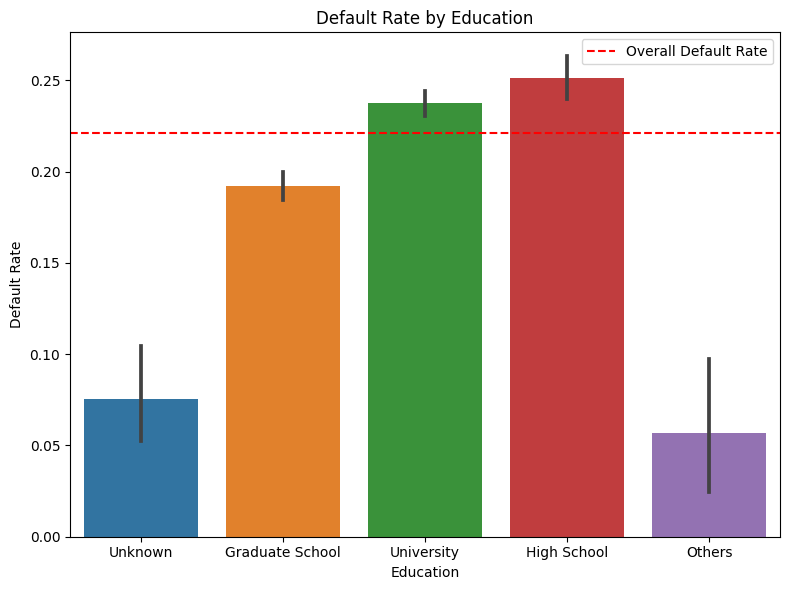

In [13]:
# Define common labels
education_labels = ["Unknown", "Graduate School", "University", "High School", "Others"]
marriage_labels = ["Unknown", "Married", "Single", "Other"]
sex_labels = ["Male", "Female"]

# ---------- Education ----------
plt.figure(figsize=(8, 6))
sns.barplot(x="education_cat", y="default_payment_next_month", data=df)
plt.title("Default Rate by Education")
plt.xlabel("Education")
plt.ylabel("Default Rate")
plt.xticks(ticks=range(len(education_labels)), labels=education_labels)
plt.axhline(y=df["default_payment_next_month"].mean(), color="r", linestyle="--", label="Overall Default Rate")
plt.legend()
plt.tight_layout()
plt.show()


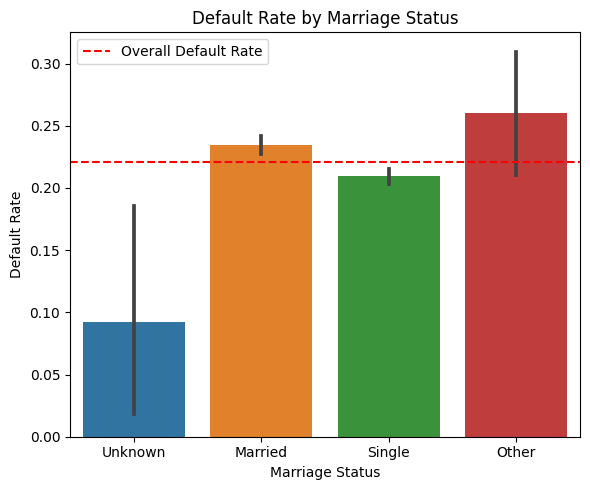

In [20]:
plt.figure(figsize=(6, 5))
sns.barplot(x="marriage_cat", y="default_payment_next_month", data=df)
plt.title("Default Rate by Marriage Status")
plt.xlabel("Marriage Status")
plt.ylabel("Default Rate")
plt.xticks(ticks=range(len(marriage_labels)), labels=marriage_labels)
plt.axhline(y=df["default_payment_next_month"].mean(), color="r", linestyle="--", label="Overall Default Rate")
plt.legend()
plt.tight_layout()
plt.show()

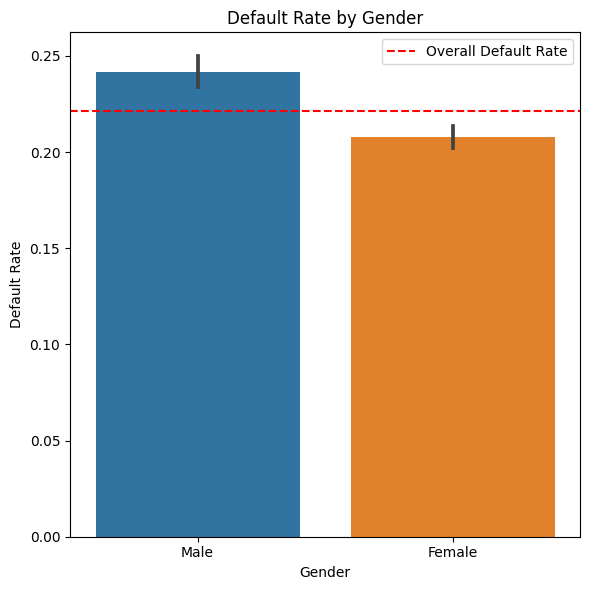

In [19]:
# ---------- Gender ----------
plt.figure(figsize=(6, 6))
sns.barplot(x="sex_cat", y="default_payment_next_month", data=df)
plt.title("Default Rate by Gender")
plt.xlabel("Gender")
plt.ylabel("Default Rate")
plt.xticks(ticks=range(len(sex_labels)), labels=sex_labels)
plt.axhline(y=df["default_payment_next_month"].mean(), color="r", linestyle="--", label="Overall Default Rate")
plt.legend()
plt.tight_layout()
plt.show()

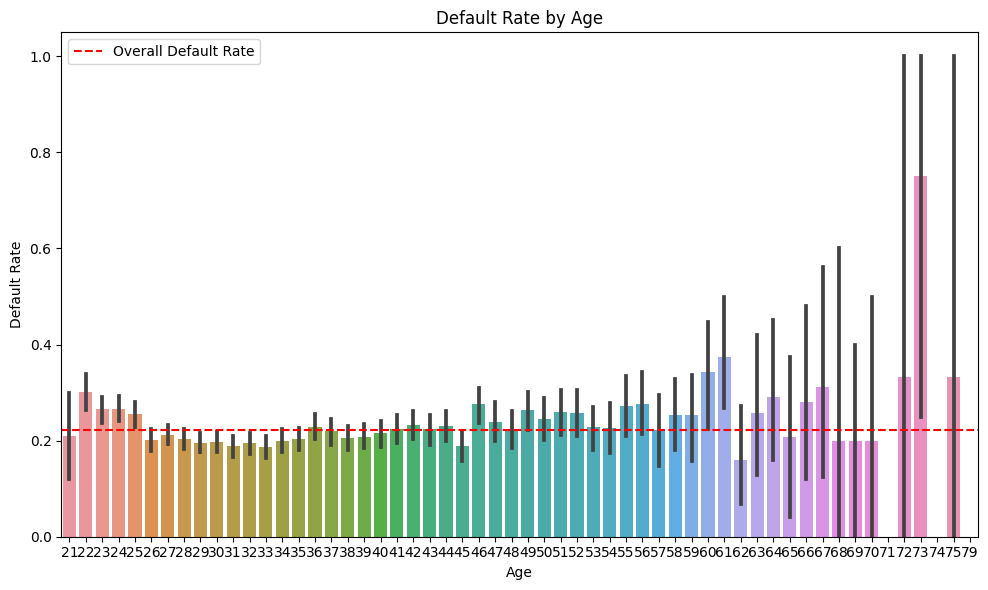

In [16]:
# ---------- Age ----------
plt.figure(figsize=(10, 6))
sns.barplot(x="age", y="default_payment_next_month", data=df)
plt.title("Default Rate by Age")
plt.xlabel("Age")
plt.ylabel("Default Rate")
plt.axhline(y=df["default_payment_next_month"].mean(), color="r", linestyle="--", label="Overall Default Rate")
plt.legend()
plt.tight_layout()
plt.show()

# Credit limit distribution analysis

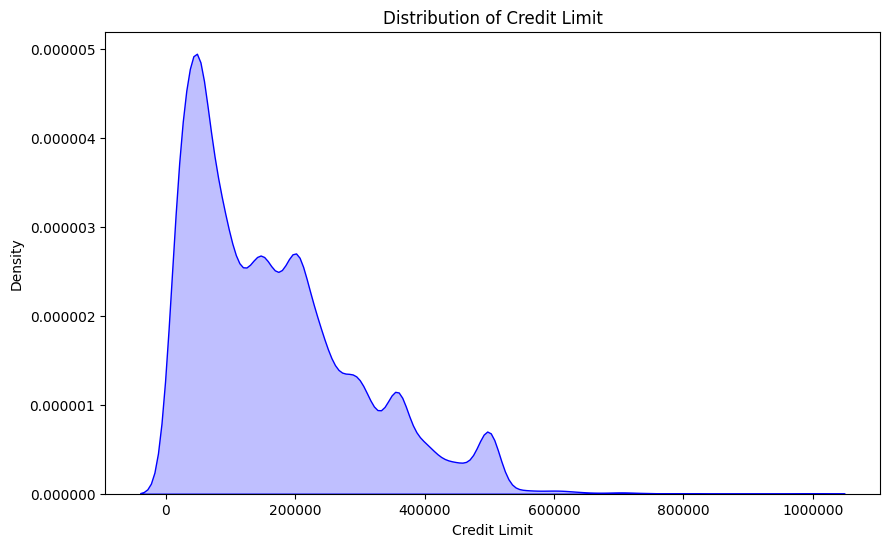

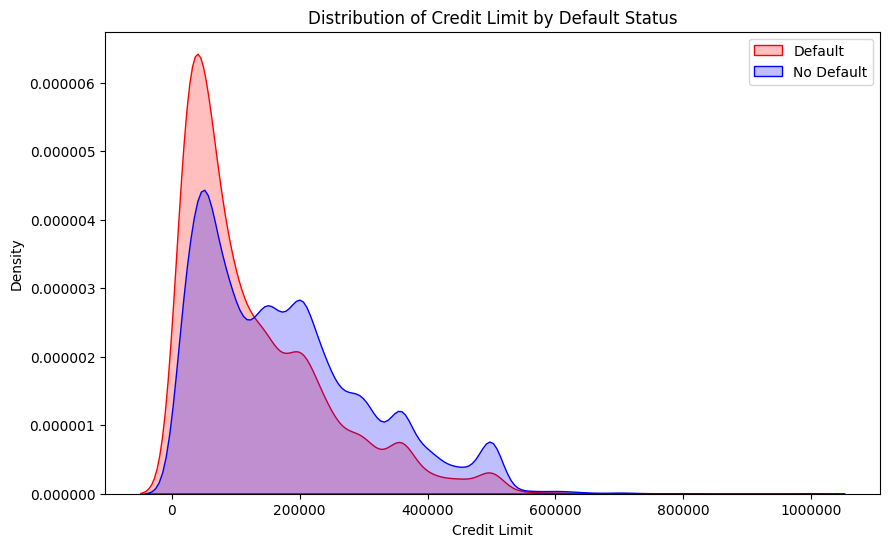

In [21]:
# Credit limit analysis
plt.figure(figsize=(10, 6))
sns.kdeplot(df["limit_bal"], color="blue", shade=True)
plt.title("Distribution of Credit Limit")
plt.xlabel("Credit Limit")
plt.ylabel("Density")
plt.ticklabel_format(style="plain", axis="both", useOffset=False)
plt.show()

# Credit limit by default status
plt.figure(figsize=(10, 6))
plt.title("Distribution of Credit Limit by Default Status")
plt.xlabel("Credit Limit")
plt.ylabel("Density")
sns.kdeplot(
    df[df["default_payment_next_month"] == 1]["limit_bal"],
    color="red",
    shade=True,
    label="Default",
)
sns.kdeplot(
    df[df["default_payment_next_month"] == 0]["limit_bal"],
    color="blue",
    shade=True,
    label="No Default",
)
plt.ticklabel_format(style="plain", axis="both", useOffset=False)
plt.legend()
plt.show()